## Bike Sharing Assignment

In [576]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Step 1: Reading and Understanding the Data


In [577]:
# Importing day.csv
bikeRental = pd.read_csv('day.csv')
bikeRental.shape

(730, 16)

In [578]:
bikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [579]:
bikeRental.describe()
#no missing values

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [580]:
bikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Step 2: Understanding Data
#### changing categorial values to string equivalent

In [581]:
def cat_weekday(x):
    return x.map({
        0:'Sun',
        1:'Mon',
        2:'Tue',
        3:'Wed',
        4:'Thu',
        5:'Fri',
        6:'Sat'        
    })

bikeRental[['weekday']] = bikeRental[['weekday']].apply(cat_weekday)

In [582]:
bikeRental['weekday'].value_counts()

Mon    105
Tue    105
Fri    104
Wed    104
Thu    104
Sun    104
Sat    104
Name: weekday, dtype: int64

In [583]:
def cat_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })

bikeRental[['mnth']] = bikeRental[['mnth']].apply(cat_mnth)

In [584]:
bikeRental['mnth'].value_counts()

Dec    62
Jul    62
May    62
Mar    62
Oct    62
Jan    62
Aug    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [585]:
bikeRental['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [586]:
def yr_map(x):
    return x.map({0: '2018', 1: '2019'})
bikeRental[['yr']] = bikeRental[['yr']].apply(yr_map)

In [587]:
bikeRental['yr'].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [588]:
def workingday_map(x):
    return x.map({0: 'working', 1: 'holiday'})
bikeRental[['workingday']] = bikeRental[['workingday']].apply(workingday_map)

In [589]:
bikeRental['workingday'].value_counts()

holiday    504
working    226
Name: workingday, dtype: int64

In [590]:
def season_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bikeRental[['season']] = bikeRental[['season']].apply(season_map)

In [591]:
bikeRental['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [592]:
def weathersit_map(x):
    return x.map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
bikeRental[['weathersit']] = bikeRental[['weathersit']].apply(weathersit_map)

In [593]:
bikeRental['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [594]:
num_col = bikeRental[['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
num_col

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...
725,726,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [595]:
bikeRental['dteday'] = bikeRental['dteday'].astype('datetime64')

In [596]:
#bikeRental['yr'] = bikeRental['yr'].astype('datetime64')

In [597]:
#creating dataframe with numerical column
bikeRental.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Step 3: Data Visualization

#### Visualising Numeric Variables

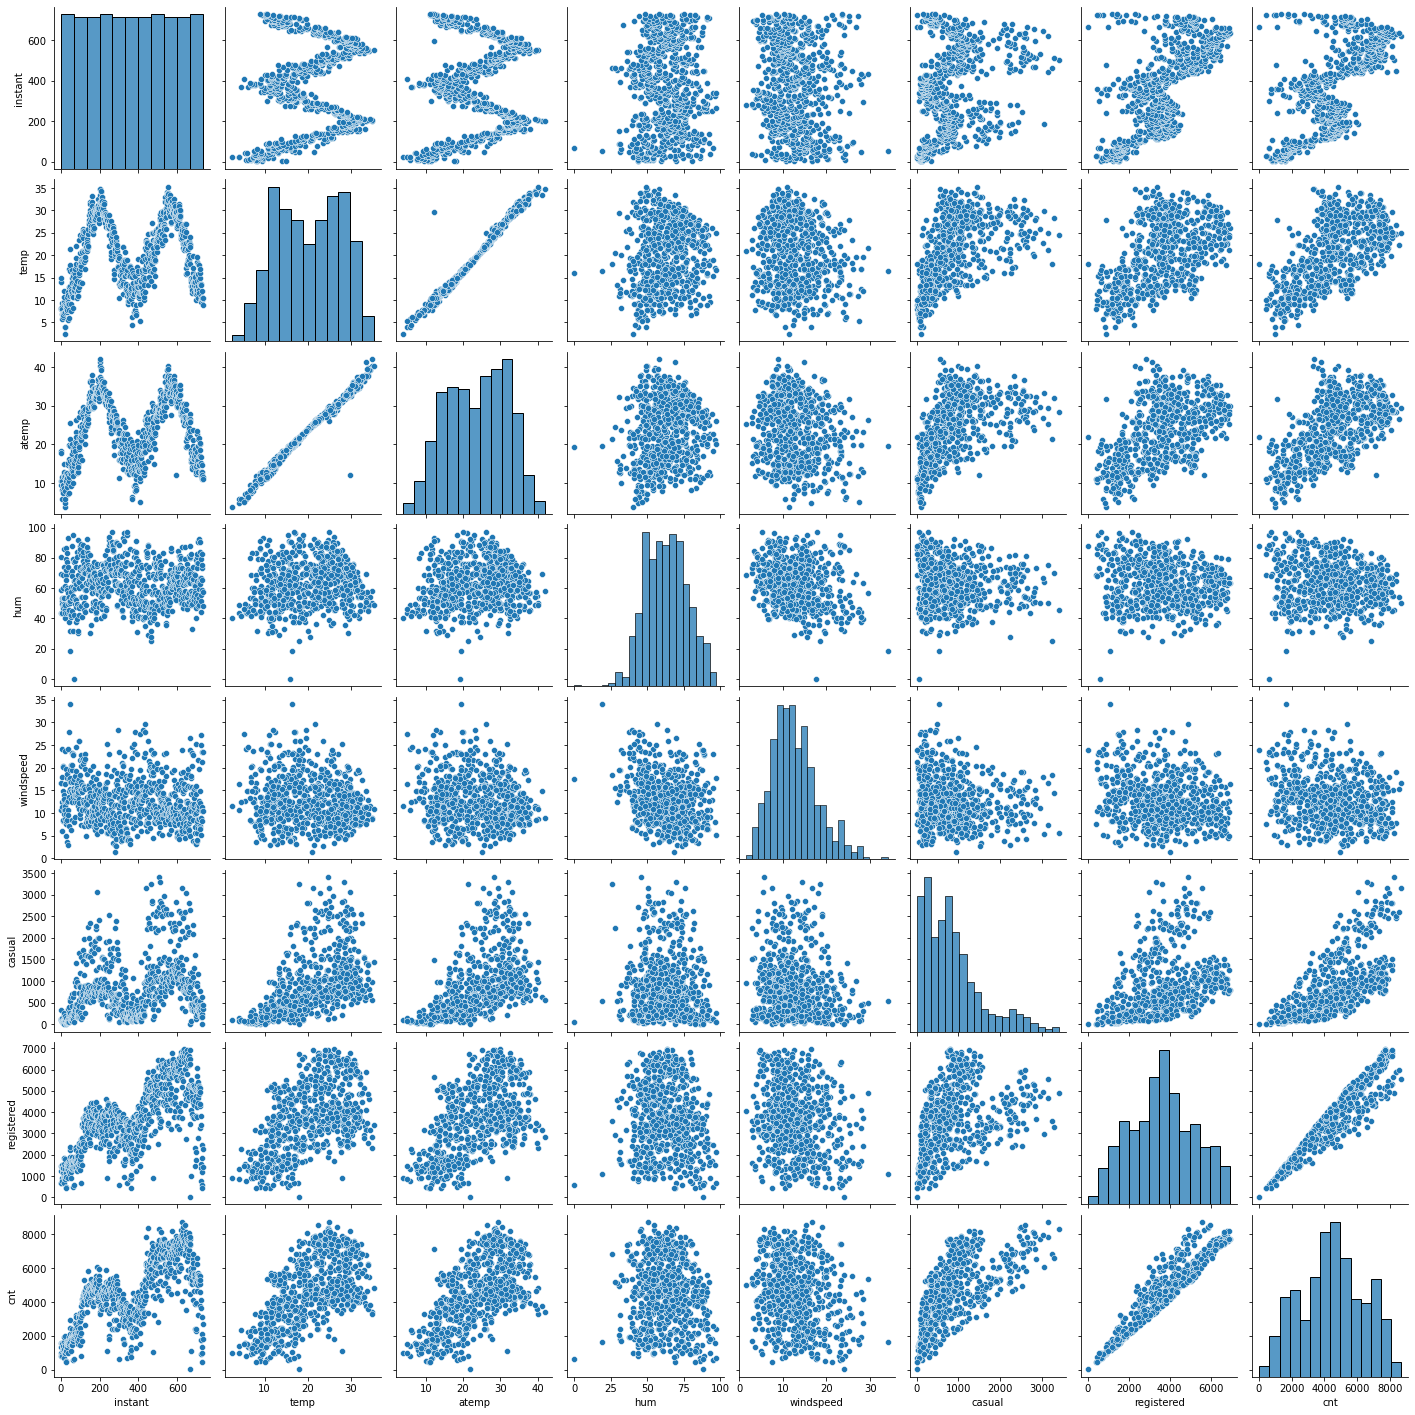

In [598]:

sns.pairplot(num_col)
plt.show()

#### Visualising Categorical Variables

In [599]:
cat_col = bikeRental[['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']]

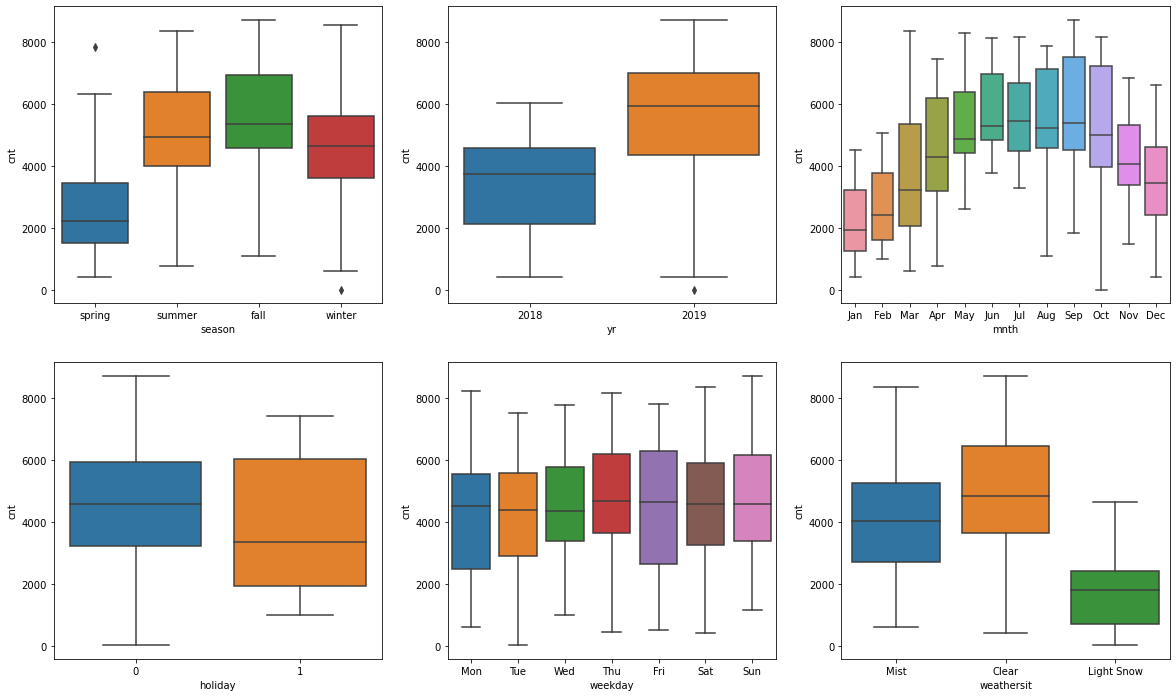

In [600]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeRental)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeRental)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeRental)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeRental)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeRental)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeRental)
plt.show()

In [601]:

#sns.pairplot(bikeRental)
#plt.show()

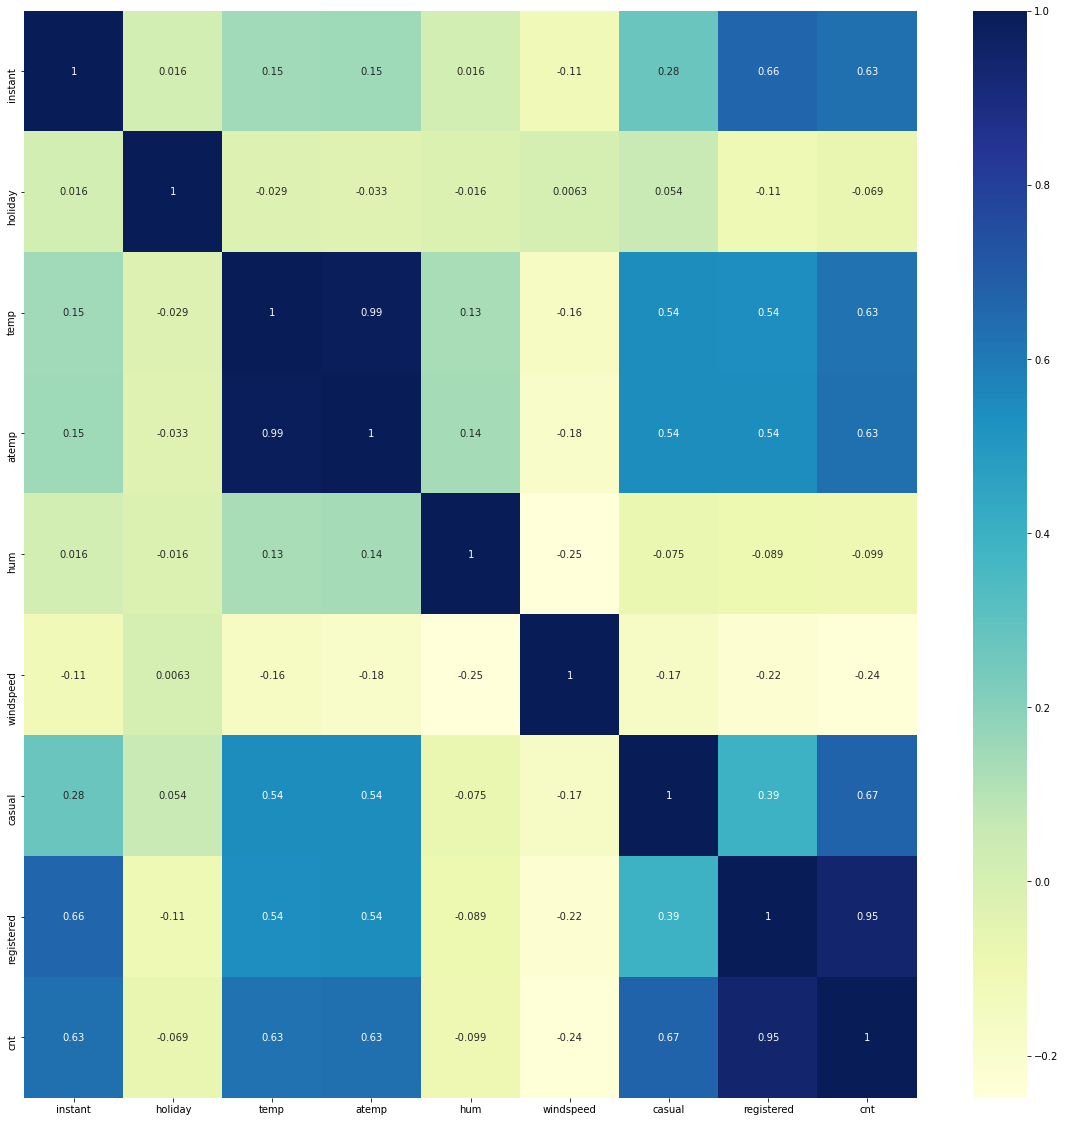

In [602]:
plt.figure(figsize=(20,20))
sns.heatmap(bikeRental.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [603]:
bikeRental.corr()

,instant,holiday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.016275,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
holiday,0.016275,1.000000,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
temp,0.150738,-0.028764,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,-0.032703,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.015662,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,0.006257,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.054055,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,-0.109142,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.629896,-0.068764,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


#### cnt seems to be highly related to:
- temp
- atemp
- casual
- registered

#### temp and atemp seems to be highly related so these can be ignored


In [604]:
x = bikeRental[[ 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
x

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [605]:
#dropping atemp column
bikeRental.drop('atemp', axis=1,inplace=True)

In [606]:
bikeRental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,Jan,0,Mon,holiday,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,Jan,0,Tue,holiday,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,Jan,0,Wed,holiday,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,Jan,0,Thu,holiday,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,Jan,0,Fri,holiday,Clear,9.305237,43.6957,12.522300,82,1518,1600


### Step 3: Data Preparation

In [607]:
bikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(6)
memory usage: 85.7+ 

In [608]:
# Select all categorical variables
bikeRental_categorical = bikeRental.select_dtypes(include=['object'])
bikeRental_categorical.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'], dtype='object')

In [609]:
# One Hot Encoding - convert into dummies

bikeRental_dummies = pd.get_dummies(bikeRental_categorical,drop_first=True)
bikeRental_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [610]:
list(bikeRental_categorical.columns)
bikeRental = bikeRental.drop(list(bikeRental_categorical.columns),axis=1)
bikeRental = pd.concat([bikeRental, bikeRental_dummies], axis=1)
bikeRental.head()

,instant,dteday,holiday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working,weathersit_Light Snow,weathersit_Mist
0,1,2018-01-01,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,1,0,0,0,0,0,0,0,1
1,2,2018-02-01,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,1,0,0,0,1
2,3,2018-03-01,0,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,1,0,0,0
3,4,2018-04-01,0,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,1,0,0,0,0,0
4,5,2018-05-01,0,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [611]:
bikeRental.shape

(730, 33)

In [612]:
#dropping instant, dteday, casual and registered (cnt = casual +registered) column as they are not of much use in modelling
bikeRental.drop('instant', axis=1,inplace=True)
bikeRental.drop('dteday', axis=1,inplace=True)
bikeRental.drop('casual', axis=1,inplace=True)
bikeRental.drop('registered', axis=1,inplace=True)
bikeRental.head()

,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working,weathersit_Light Snow,weathersit_Mist
0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets

In [613]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikeRental_train, bikeRental_test = train_test_split(bikeRental, train_size = 0.7, test_size = 0.3, random_state = 100)

In [614]:
bikeRental_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                219 non-null    int64  
 1   temp                   219 non-null    float64
 2   hum                    219 non-null    float64
 3   windspeed              219 non-null    float64
 4   cnt                    219 non-null    int64  
 5   season_spring          219 non-null    uint8  
 6   season_summer          219 non-null    uint8  
 7   season_winter          219 non-null    uint8  
 8   yr_2019                219 non-null    uint8  
 9   mnth_Aug               219 non-null    uint8  
 10  mnth_Dec               219 non-null    uint8  
 11  mnth_Feb               219 non-null    uint8  
 12  mnth_Jan               219 non-null    uint8  
 13  mnth_Jul               219 non-null    uint8  
 14  mnth_Jun               219 non-null    uint8  
 15  mnth_

In [615]:
bikeRental_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                510 non-null    int64  
 1   temp                   510 non-null    float64
 2   hum                    510 non-null    float64
 3   windspeed              510 non-null    float64
 4   cnt                    510 non-null    int64  
 5   season_spring          510 non-null    uint8  
 6   season_summer          510 non-null    uint8  
 7   season_winter          510 non-null    uint8  
 8   yr_2019                510 non-null    uint8  
 9   mnth_Aug               510 non-null    uint8  
 10  mnth_Dec               510 non-null    uint8  
 11  mnth_Feb               510 non-null    uint8  
 12  mnth_Jan               510 non-null    uint8  
 13  mnth_Jul               510 non-null    uint8  
 14  mnth_Jun               510 non-null    uint8  
 15  mnth_

In [616]:
y_bikeRental_train = bikeRental_train.pop('cnt')
X_bikeRental_train = bikeRental_train

In [617]:
bikeRental_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                219 non-null    int64  
 1   temp                   219 non-null    float64
 2   hum                    219 non-null    float64
 3   windspeed              219 non-null    float64
 4   cnt                    219 non-null    int64  
 5   season_spring          219 non-null    uint8  
 6   season_summer          219 non-null    uint8  
 7   season_winter          219 non-null    uint8  
 8   yr_2019                219 non-null    uint8  
 9   mnth_Aug               219 non-null    uint8  
 10  mnth_Dec               219 non-null    uint8  
 11  mnth_Feb               219 non-null    uint8  
 12  mnth_Jan               219 non-null    uint8  
 13  mnth_Jul               219 non-null    uint8  
 14  mnth_Jun               219 non-null    uint8  
 15  mnth_

### Step 5: Scaling

In [618]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [619]:
bikeRental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                730 non-null    int64  
 1   temp                   730 non-null    float64
 2   hum                    730 non-null    float64
 3   windspeed              730 non-null    float64
 4   cnt                    730 non-null    int64  
 5   season_spring          730 non-null    uint8  
 6   season_summer          730 non-null    uint8  
 7   season_winter          730 non-null    uint8  
 8   yr_2019                730 non-null    uint8  
 9   mnth_Aug               730 non-null    uint8  
 10  mnth_Dec               730 non-null    uint8  
 11  mnth_Feb               730 non-null    uint8  
 12  mnth_Jan               730 non-null    uint8  
 13  mnth_Jul               730 non-null    uint8  
 14  mnth_Jun               730 non-null    uint8  
 15  mnth_M

In [620]:

scaling_vars = ['temp', 'hum', 'windspeed']

bikeRental_train[scaling_vars] = scaler.fit_transform(bikeRental_train[scaling_vars])
bikeRental_train.head()

,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working,weathersit_Light Snow,weathersit_Mist
653,0,0.509887,0.575354,0.300794,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
576,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
728,0,0.245101,0.498067,0.663106,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
482,0,0.395666,0.504508,0.188475,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [621]:
bikeRental_train.describe()

,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_working,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.537262,0.650369,0.320768,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.288235,0.029412,0.343137
std,0.157763,0.225844,0.145882,0.169797,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.540519,0.653714,0.296763,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [622]:
bikeRental_train.shape

(510, 28)

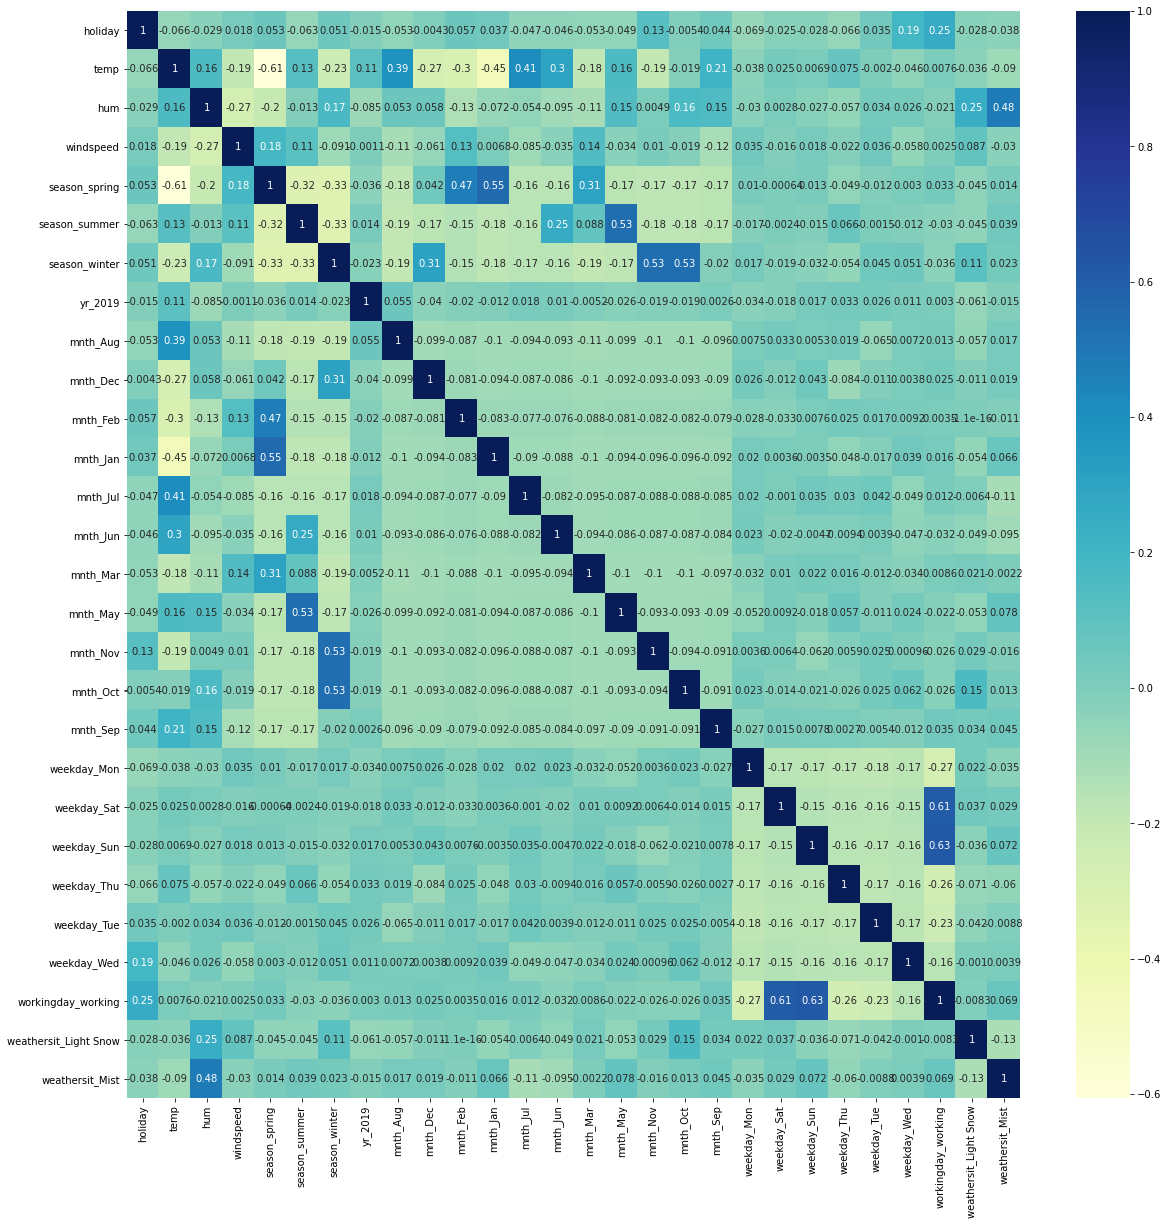

In [623]:
plt.figure(figsize = (20, 20))
sns.heatmap(bikeRental_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 6: Modelling

#### Adding all the variables to the model

- remove columns with p value greater than 0.05
- remove VIF greater than 5
- high p value, high vif:  DROP
- high-low
    - high vif, low p value : 
    - high p value, low vif : 1st priority is to DROP high p-value
- low vif, low p value : KEEP

In [624]:
bikeRental_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_working',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [625]:
bikeRental_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                510 non-null    int64  
 1   temp                   510 non-null    float64
 2   hum                    510 non-null    float64
 3   windspeed              510 non-null    float64
 4   season_spring          510 non-null    uint8  
 5   season_summer          510 non-null    uint8  
 6   season_winter          510 non-null    uint8  
 7   yr_2019                510 non-null    uint8  
 8   mnth_Aug               510 non-null    uint8  
 9   mnth_Dec               510 non-null    uint8  
 10  mnth_Feb               510 non-null    uint8  
 11  mnth_Jan               510 non-null    uint8  
 12  mnth_Jul               510 non-null    uint8  
 13  mnth_Jun               510 non-null    uint8  
 14  mnth_Mar               510 non-null    uint8  
 15  mnth_

In [626]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [627]:
lm = LinearRegression()
lm.fit(X_bikeRental_train, y_bikeRental_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_bikeRental_train, y_bikeRental_train)

In [628]:
list(zip(X_bikeRental_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('workingday_working', False, 3),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [629]:
col = X_bikeRental_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [630]:
X_bikeRental_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_working'],
      dtype='object')

In [631]:
#Building a linear model

X_bikeRental_train_rfe = X_bikeRental_train[col]
import statsmodels.api as sm  
X_bikeRental_train_rfe = sm.add_constant(X_bikeRental_train_rfe)
lm = sm.OLS(y_bikeRental_train,X_bikeRental_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
vif['Features'] = X_bikeRental_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_bikeRental_train_rfe.values, i) for i in range(X_bikeRental_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.34e-189
Time:                        21:13:43   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2805.55

In [632]:
X = X_bikeRental_train_rfe.drop('season_spring', 1)
# Building  2nd fitted model
X_bikeRental_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_bikeRental_train, X_bikeRental_train_lm).fit()
print(lr_3.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.54e-188
Time:                        21:13:43   Log-Likelihood:                -4115.4
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2249.67

,Features,VIF
0,const,51.75
2,temp,2.32
6,season_winter,2.08
3,hum,1.90
11,mnth_Nov,1.70
9,mnth_Jan,1.67
14,weathersit_Mist,1.55
8,mnth_Dec,1.47
5,season_summer,1.44
10,mnth_Jul,1.43


In [633]:
X = X.drop('mnth_Dec', 1)
# Building  3rd fitted model
X_bikeRental_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_bikeRental_train, X_bikeRental_train_lm).fit()
print(lr_3.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.15e-189
Time:                        21:13:43   Log-Likelihood:                -4117.0
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2163.57

,Features,VIF
0,const,49.82
2,temp,2.07
6,season_winter,1.91
3,hum,1.89
8,mnth_Jan,1.55
13,weathersit_Mist,1.55
10,mnth_Nov,1.45
9,mnth_Jul,1.43
5,season_summer,1.41
12,weathersit_Light Snow,1.24


In [634]:
X = X.drop('mnth_Nov', 1)
# Building  4th fitted model
X_bikeRental_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_bikeRental_train, X_bikeRental_train_lm).fit()
print(lr_3.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.03e-190
Time:                        21:13:43   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2145.95

,Features,VIF
0,const,49.60
2,temp,2.06
3,hum,1.88
8,mnth_Jan,1.55
12,weathersit_Mist,1.55
6,season_winter,1.53
9,mnth_Jul,1.43
5,season_summer,1.41
11,weathersit_Light Snow,1.24
4,windspeed,1.19


In [635]:
X.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [636]:
X = X.drop(['const'], axis=1)

### Residual Analysis of the train data

Text(0.5, 0, 'Errors')

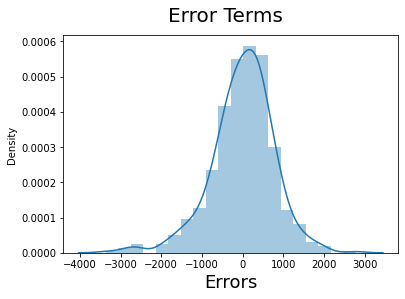

In [637]:
y_bikeRental_train_cnt = lr_3.predict(X_bikeRental_train_lm)
fig = plt.figure()
sns.distplot((y_bikeRental_train - y_bikeRental_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 6: Testing the model

In [638]:
test_vars = ['temp', 'hum', 'windspeed']

bikeRental_test[test_vars] = scaler.transform(bikeRental_test[test_vars])
bikeRental_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                219 non-null    int64  
 1   temp                   219 non-null    float64
 2   hum                    219 non-null    float64
 3   windspeed              219 non-null    float64
 4   cnt                    219 non-null    int64  
 5   season_spring          219 non-null    uint8  
 6   season_summer          219 non-null    uint8  
 7   season_winter          219 non-null    uint8  
 8   yr_2019                219 non-null    uint8  
 9   mnth_Aug               219 non-null    uint8  
 10  mnth_Dec               219 non-null    uint8  
 11  mnth_Feb               219 non-null    uint8  
 12  mnth_Jan               219 non-null    uint8  
 13  mnth_Jul               219 non-null    uint8  
 14  mnth_Jun               219 non-null    uint8  
 15  mnth_

In [639]:
y_bikeRental_test = bikeRental_test.pop('cnt')
X_bikeRental_test = bikeRental_test

In [640]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_bikeRental_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [641]:
y_pred = lr_3.predict(X_test_new)

### Step 7: Model Evaluation

Text(0, 0.5, 'y_pred')

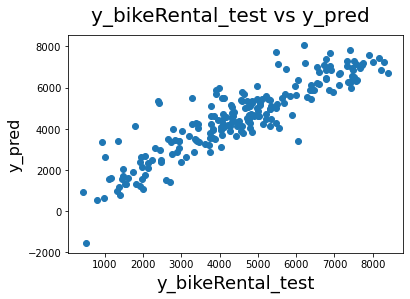

In [644]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_bikeRental_test,y_pred)
fig.suptitle('y_bikeRental_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_bikeRental_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                                     # Y-label

In [648]:
from sklearn.metrics import r2_score
r2_score(y_true=y_bikeRental_test,y_pred=y_pred)

0.8029170032329542

In [649]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          6.03e-190
Time:                        21:52:28   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2145.95

$ cnt = - 856.66  \times  holiday + 4969.03  \times  temp - 1532.87 \times hum 
- 1690.34 \times windspeed + 647.41 \times season_summer + 1093.89 \times season_winter 
+ 1989.68 \times yr_2019 - 330.48 \times mnth_Jan - 409.59 \times mnth_Jul + 818.13 \times mnth_Sep
- 2053.43 \times weathersit_Light Snow - 450.80 \times weathersit_Mist
$